In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002_AR1.e-1_VG0_OL0\\train_history.csv'
df_train_history = pd.read_csv(filename)

In [3]:
ckpt1, ckpt2, ckpt3 = np.argmin(df_train_history['val_mse_loss']), np.argmin(df_train_history['val_gen_loss']) - 1, np.argmin(df_train_history['val_gen_loss'])

$\mathcal{L}_{rec}$ reaches minimum on validation data at epoch=383, and $\mathcal{L}_{G}$ reaches minimum on validation data at epoch=470.  
epoch=383, 469 and 470 are indicated by vertical dashed lines below.

### *Plot the reconstruction loss $\mathcal{L}_{rec}$.*

Text(0.15, 0.9, '(a)')

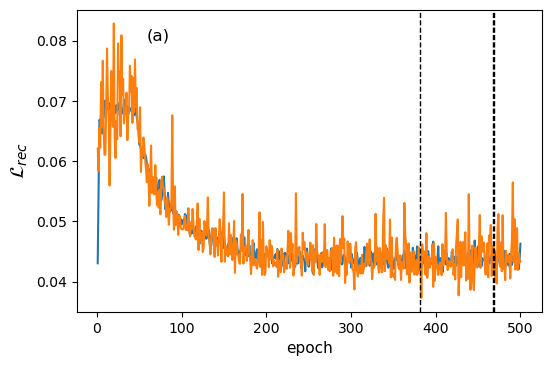

In [4]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{L}_{rec}$', fontsize=14)

plt.plot(df_train_history.index+1, df_train_history['mse_loss'])
plt.plot(df_train_history.index+1, df_train_history['val_mse_loss'])

ymin, ymax = plt.gca().get_ylim()

plt.plot([ckpt1, ckpt1], [ymin, ymax], '--k', lw=1)
plt.plot([ckpt2, ckpt2], [ymin, ymax], '--k', lw=1)
plt.plot([ckpt3, ckpt3], [ymin, ymax], '--k', lw=1)

plt.ylim(ymin, ymax)

plt.annotate('(a)', (0.15, 0.9), xycoords='axes fraction', fontsize=12)

### *Plot the adversarial loss $\mathcal{L}_{adv}$.*
The figure below shows that $\mathcal{L}_{adv}$ saturates at $-\mathrm{ln}(0.5)$ on validation data, indicating that the generator and discriminator are in balance.

Text(0.15, 0.9, '(b)')

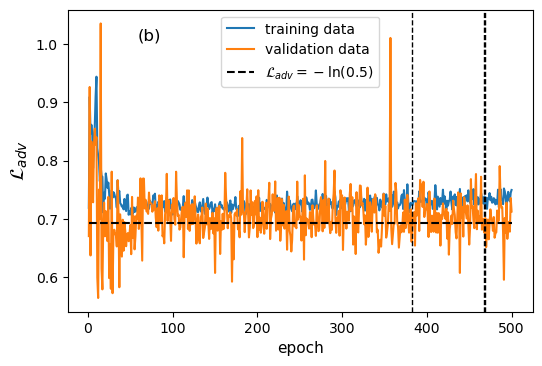

In [5]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{L}_{adv}$', fontsize=14)

plt.plot(df_train_history.index+1, df_train_history['adversarial_loss'], label='training data')
plt.plot(df_train_history.index+1, df_train_history['val_adversarial_loss'], label='validation data')

# The line $\mathcal{L}_{adv}=-\mathrm{ln}(0.5)$
plt.plot([1,500], [-np.log(0.5),-np.log(0.5)], '--k', label='$\mathcal{L}_{adv}=-\mathrm{ln}(0.5)$')

plt.legend()

ymin, ymax = plt.gca().get_ylim()

plt.plot([ckpt1, ckpt1], [ymin, ymax], '--k', lw=1)
plt.plot([ckpt2, ckpt2], [ymin, ymax], '--k', lw=1)
plt.plot([ckpt3, ckpt3], [ymin, ymax], '--k', lw=1)

plt.ylim(ymin, ymax)

plt.annotate('(b)', (0.15, 0.9), xycoords='axes fraction', fontsize=12)


### *Plot the generator loss $\mathcal{L}_{G}=(1-\lambda_{adv})\mathcal{L}_{rec}+\lambda_{adv}\mathcal{L}_{adv}$.*

Text(0.15, 0.9, '(c)')

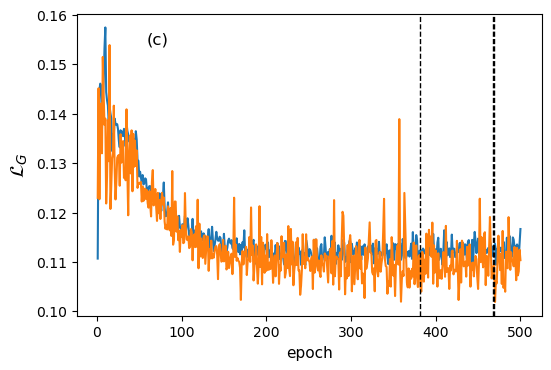

In [6]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{L}_{G}$', fontsize=14)

plt.plot(df_train_history.index+1, df_train_history['gen_loss'])
plt.plot(df_train_history.index+1, df_train_history['val_gen_loss'])

ymin, ymax = plt.gca().get_ylim()

plt.plot([ckpt1, ckpt1], [ymin, ymax], '--k', lw=1)
plt.plot([ckpt2, ckpt2], [ymin, ymax], '--k', lw=1)
plt.plot([ckpt3, ckpt3], [ymin, ymax], '--k', lw=1)

plt.ylim(ymin, ymax)

plt.annotate('(c)', (0.15, 0.9), xycoords='axes fraction', fontsize=12)